---
comments: true
layout: post
title: Data Structure Writeup
courses: { csp: {week: 26} }
---

# Collections

For this project, I have created a database called activities that stores the data for the locations and names of therapies. I have also added columns to the user database.

Therapy Database:
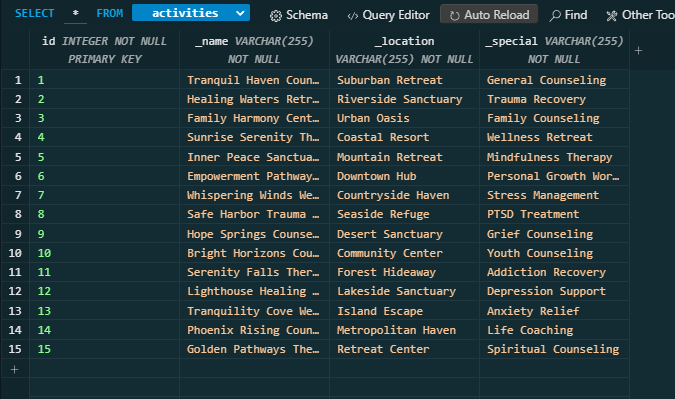

Therapy Database Code:

In [ ]:
""" database dependencies to support sqliteDB examples """
from random import randrange
from datetime import date
import os, base64
import json

from __init__ import app, db
from sqlalchemy.exc import IntegrityError
from werkzeug.security import generate_password_hash, check_password_hash


''' Tutorial: https://www.sqlalchemy.org/library.html#tutorials, try to get into Python shell and follow along '''

class Activity(db.Model):
    __tablename__ = 'activities'

    id = db.Column(db.Integer, primary_key=True)
    _name = db.Column(db.String(255), unique=False, nullable=False)
    _location = db.Column(db.String(255), unique=False, nullable=False)
    _special = db.Column(db.String(255), unique=False, nullable=False)

    def __init__(self, name, location, special):
        self._name = name
        self._location = location
        self._special = special

    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, name):
        self._name = name
    
    @property
    def location(self):
        return self._location
    
    @location.setter
    def location(self, location):
        self._location = location
    
    @property
    def special(self):
        return self._special
    
    @special.setter
    def special(self, special):
        self._special = special
    
    def __str__(self):
        return json.dumps(self.read())

    def create(self):
        try:
            db.session.add(self)
            db.session.commit()
            return self
        except IntegrityError:
            db.session.remove()
            return None

    def read(self):
        return {
            "id": self.id,
            "name": self.name,
            "location": self.location,
            "special": self.special,
        }

def initActivities():
    with app.app_context():
        db.create_all()
        activities = [
            Activity(name="Tranquil Haven Counseling Center", location="Suburban Retreat", special="General Counseling"),
            Activity(name="Healing Waters Retreat", location="Riverside Sanctuary", special="Trauma Recovery"),
            Activity(name="Family Harmony Center", location="Urban Oasis", special="Family Counseling"),
            Activity(name="Sunrise Serenity Therapy Spa", location="Coastal Resort", special="Wellness Retreat"),
            Activity(name="Inner Peace Sanctuary", location="Mountain Retreat", special="Mindfulness Therapy"),
            Activity(name="Empowerment Pathways Center", location="Downtown Hub", special="Personal Growth Workshops"),
            Activity(name="Whispering Winds Wellness Retreat", location="Countryside Haven", special="Stress Management"),
            Activity(name="Safe Harbor Trauma Center", location="Seaside Refuge", special="PTSD Treatment"),
            Activity(name="Hope Springs Counseling Oasis", location="Desert Sanctuary", special="Grief Counseling"),
            Activity(name="Bright Horizons Counseling Collective", location="Community Center", special="Youth Counseling"),
            Activity(name="Serenity Falls Therapy Retreat", location="Forest Hideaway", special="Addiction Recovery"),
            Activity(name="Lighthouse Healing Institute", location="Lakeside Sanctuary", special="Depression Support"),
            Activity(name="Tranquility Cove Wellness Center", location="Island Escape", special="Anxiety Relief"),
            Activity(name="Phoenix Rising Counseling Center", location="Metropolitan Haven", special="Life Coaching"),
            Activity(name="Golden Pathways Therapy Haven", location="Retreat Center", special="Spiritual Counseling")
        ]
        for activity in activities:
            try:
                activity.create()
            except IntegrityError:
                db.session.rollback()
                print(f"Record exists")

User Database (My contribution):
<br>
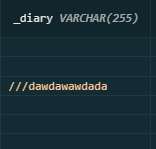

User Database Code (All Diary related code is mine):

In [ ]:
""" database dependencies to support sqliteDB examples """
from random import randrange
from datetime import date
import os, base64
import json
from __init__ import app, db
from sqlalchemy.exc import IntegrityError
from werkzeug.security import generate_password_hash, check_password_hash
''' Tutorial: https://www.sqlalchemy.org/library.html#tutorials, try to get into Python shell and follow along '''
# Define the Post class to manage actions in 'posts' table,  with a relationship to 'users' table
class User(db.Model):
    __tablename__ = 'users'  # table name is plural, class name is singular
    # Define the User schema with "vars" from object
    id = db.Column(db.Integer, primary_key=True)
    _name = db.Column(db.String(255), unique=False, nullable=False)
    _uid = db.Column(db.String(255), unique=True, nullable=False)
    _password = db.Column(db.String(255), unique=False, nullable=False)
    _diary = db.Column(db.String(255))
    _exercise = db.Column(db.JSON, nullable=True)
    _sleep = db.Column(db.JSON, nullable=True)
    _role = db.Column(db.String(255), unique=False, nullable=False)
    # Defines a relationship between User record and Notes table, one-to-many (one user to many notes)
    # constructor of a User object, initializes the instance variables within object (self)
    def __init__(self, name, uid, password="123qwerty", diary='', exercise='', sleep='', role="user"):
        self._name = name    # variables with self prefix become part of the object,
        self._uid = uid
        self.set_password(password)
        self._exercise = exercise
        self._sleep = sleep
        self._diary = diary
        self._role = role
    # a name getter method, extracts name from object
    @property
    def role(self):
        return self._role
    @role.setter
    def role(self, role):
        self._role = role
    def is_admin(self):
        return self._role == "Admin"
    
    @property
    def sleep(self):
        return self._sleep
    @sleep.setter
    def sleep(self, sleep):
        self._sleep = sleep
         
    @property
    def exercise(self):
        return self._exercise
    @exercise.setter
    def exercise(self, exercise):
        self._exercise = exercise
    
    @property
    def diary(self):
        return self._diary
    @diary.setter
    def diary(self, diary):
        self._diary = diary
        
    @property
    def name(self):
        return self._name
    # a setter function, allows name to be updated after initial object creation
    @name.setter
    def name(self, name):
        self._name = name
    # a getter method, extracts email from object
    @property
    def uid(self):
        return self._uid
    # a setter function, allows name to be updated after initial object creation
    @uid.setter
    def uid(self, uid):
        self._uid = uid
    # check if uid parameter matches user id in object, return boolean
    def is_uid(self, uid):
        return self._uid == uid
    @property
    def password(self):
        return self._password[0:10] + "..." # because of security only show 1st characters
    # update password, this is conventional setter
    def set_password(self, password):
        """Create a hashed password."""
        self._password = generate_password_hash(password, "pbkdf2:sha256", salt_length=10)
    # check password parameter versus stored/encrypted password
    def is_password(self, password):
        """Check against hashed password."""
        result = check_password_hash(self._password, password)
        return result
    #property is returned as string, to avoid unfriendly outcomes
    # output content using str(object) in human readable form, uses getter
    # output content using json dumps, this is ready for API response
    def __str__(self):
        return json.dumps(self.read())
    # CRUD create/add a new record to the table
    # returns self or None on error
    def create(self):
        try:
            # creates a person object from User(db.Model) class, passes initializers
            db.session.add(self)  # add prepares to persist person object to Users table
            db.session.commit()  # SqlAlchemy "unit of work pattern" requires a manual commit
            return self
        except IntegrityError:
            db.session.remove()
            return None
    # CRUD read converts self to dictionary
    # returns dictionary
    def read(self):
        return {
            "id": self.id,
            "name": self.name,
            "uid": self.uid,
            "diary": self.diary,
            "sleep": self.sleep,
            "exercise": self.exercise,
            "role": self.role
        }
    # CRUD update: updates user name, password, phone
    # returns self
    def update(self, name="", uid="", password="", diary="", sleep = "", exercise = ""):
        """only updates values with length"""
        if len(name) > 0:
            self.name = name
        if len(uid) > 0:
            self.uid = uid
        if len(password) > 0:
            self.set_password(password)
        if len(diary) > 0:
            self.diary = diary
        if len(sleep) > 0:
            self.sleep = sleep
        if len(exercise) > 0:
            self.exercise = exercise
        db.session.commit()
        return self
    # CRUD delete: remove self
    # None
    def delete(self):
        db.session.delete(self)
        db.session.commit()
        return None
    
    def updatename(self, new_name=None):
        if new_name is not None:
            self.name = new_name
            db.session.commit()
"""Database Creation and Testing """
# Builds working data for testing
def initUsers():
    with app.app_context():
        """Create database and tables"""
        db.create_all()
        """Tester data for table"""
        u1 = User(name='Justin', uid='jst', password='123jst', role="admin")
        u2 = User(name='Bella', uid='bell', password='123bell', role="admin")
        u3 = User(name='Lindsay Tang', uid='lct', password='123lin', role="admin")
        u4 = User(name='Tester', uid='test', password='123test')
        users = [u1, u2, u3, u4]
        """Builds sample user/note(s) data"""
        for user in users:
            try:
                user.create()
            except IntegrityError:
                '''fails with bad or duplicate data'''
                db.session.remove()
                print(f"Records exist, duplicate email, or error: {user.uid}")

# Lists and Dictionaries

![image.png](https://files.catbox.moe/krme19.png)
![image.png](https://files.catbox.moe/b2snoj.png)
![image.png](https://files.catbox.moe/2dojyy.png)